<a href="https://colab.research.google.com/github/mattsmiths/biol470/blob/main/week8/BIOL470_spikeProc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#@title Click to copy the class code repository
!git clone https://github.com/mattsmiths/biol470.git

Cloning into 'biol470'...
remote: Enumerating objects: 253, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 253 (delta 12), reused 10 (delta 10), pack-reused 238 (from 2)
Receiving objects: 100% (253/253), 114.81 MiB | 21.04 MiB/s, done.
Resolving deltas: 100% (51/51), done.
Updating files: 100% (133/133), done.


In [5]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import os
import pickle

## Fundamentals: what is a variable

A variable is how you can define and store data to be manipulated

In [ ]:
x = 2

You can "call" that variable by typing it into the command window below and pressing "enter" or the play button beside the window

In [ ]:
x

2

You can perform basic arthmatic with these variables as well

In [ ]:
x = 2
y = 3
z = x+y

You can use the print function to visualize the output

In [ ]:
x = 2
y = 3
z = x+y

print(z)

5


In [ ]:
Celcius = C

In [ ]:
# We're going to make a temperature converter
# we need to convert fahrenheit to celcius
# Celcius = F multipled by ( 9 /5 ) adding 32

F = 72
Celcius = (F - 32) * (5/9)


In [ ]:
print(Celcius)

22.22222222222222


Now that we've defined a algorithm, let's run it over a fake dataset and convert many values into Celcius

In [ ]:
H = 5 # this is a basic integer variable

List_of_fah = [64,72,96,24]

In [ ]:
print(List_of_fah)

[64, 72, 96, 24]


In [ ]:
import numpy as np
F = np.array([64,72,96,24])
Celcius = (F - 32) * (5/9)
print(Celcius)

[17.77777778 22.22222222 35.55555556 -4.44444444]


In [ ]:
# a list is defined by those brackets [    ] on either end
Weird_list = ['hat',5,6,'another_hat']


In [ ]:
# let's make a list of 1,000 random values from 50 - 100
random_vars = np.random.rand(1000)*100

In [ ]:
len(random_vars)

1000

In [ ]:
F = np.array(random_vars)
Celcius = (F - 32) * (5/9)

In [ ]:
len(Celcius)

1000

In [ ]:
import matplotlib

In [ ]:
from matplotlib import pyplot as plt

(array([105.,  97., 104., 107.,  92.,  91., 104., 102., 103.,  95.]),
 array([-17.7709069 , -12.22139407,  -6.67188124,  -1.12236841,
          4.42714442,   9.97665725,  15.52617008,  21.07568291,
         26.62519574,  32.17470857,  37.7242214 ]),
 <BarContainer object of 10 artists>)

<Figure size 640x480 with 0 Axes>

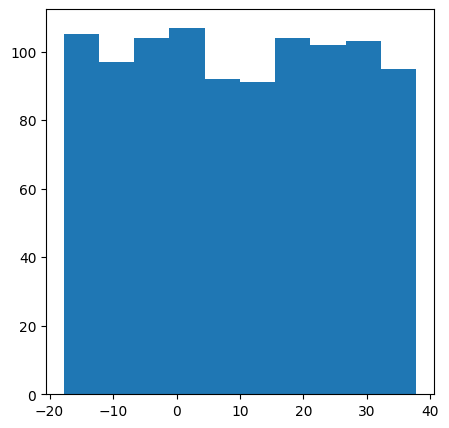

In [ ]:
# first we'll define a figure window
plt.figure() # the parenthesis represent calling a function in python

plt.figure(figsize=(5,5)) # within figsize, the first value is the width of the figure window and the second is the height

plt.hist(Celcius)

In [ ]:
np.max(Celcius)

-17.222383199206245

(-50.0, 50.0, -10.0, 130.0)

<Figure size 640x480 with 0 Axes>

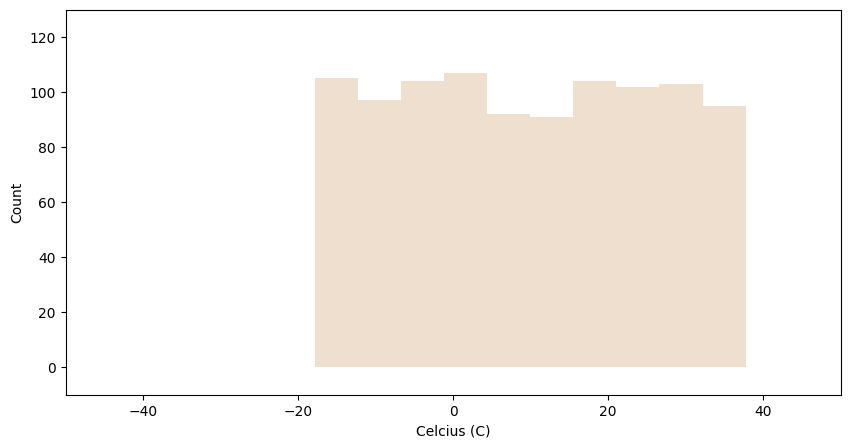

In [ ]:
# first we'll define a figure window
plt.figure() # the parenthesis represent calling a function in python

plt.figure(figsize=(10,5)) # within figsize, the first value is the width of the figure window and the second is the height

plt.hist(Celcius,color=(0.75,0.5,0.25,0.25)) # you can change color by adding in color variable

plt.xlabel('Celcius (C)',fontsize=10)
plt.ylabel('Count',fontsize=10)

plt.axis([-50,50,-10,130]) # [ xminumim, xmaximum, ymin, ymax]

# Neuron sample data

In [100]:
data1 = [ 4752.,  4036.,  3784.,  3884.,  3976.,  3976.,  3872.,  3660.,
       10540., 12016.,  2480.,  1980.,  1412.,   856.,   416.,   148.,
          64.,   188.,   576.,  1248.,  2156.,  2752.,  4068.,  5048.,
        6232.,  7560.,  9036., 10540., 12016., 12816., 13248., 13488.,
       13564., 13500., 13316., 13020., 12608., 12112., 11584., 11028.,
       10428.,  9828.,  9308.,  8920.,  8696.,  8596.,  8564.,  8604.,
        8692.,  8792.,  8836.,  8808.,  8768.,  8752.,  8720.,  8684.,
        8600.,  8488.,  8324.,  8196.,  8100.,  8012.,  7932.,  7836.,
        7688.,  7480.,  7564.,  7584.,  6748.,  6600.,  6548.,  6540.,
        6576.,  6700.,  6920.,  7176.,  7368.,  7472.,  7500.,  7456.,
        7336.,  7232.,  7192.,  7192.,  7236.,  7344.,  8396.,  8416.,
        8424.,  7604.,  7696.,  7820.,  7900.,  7952.,  7996.,  8008.,
        8020.,  8024.,  8008.,  8000.,  8032.,  8080.,  8112.,  8188.,
        8280.,  8352.,  8396.,  8416.,  8424.,  8436.,  8464.,  8512.,
        8600.,  8712.,  8832.,  8980.,  9156.,  9348.,  9508.,  9588.,
        9588.,  9624.,  9652.,  9676.,  9644.,  9576.,  9464.,  9284.,
        9036.,  8728.,  8348.,  7940.,  7540.,  7156.,  6808.,  6488.,
        6180.,  5812.,  5416.,  5064.,  4764.,  4576.,  4492.,  4504.,
        4564.,  4660.,  4820.,  5040.,  5324.,  5604.,  5888.,  6128.,
        6300.,  6440.,  6548.,  6708.,  6868.,  7036.,  7152.,  7264.,
        7412.,  7600.,  7808.,  7964.,  8028.,  7660.,  7552.,  7448.,
        7388.,  8344.,  8448.,  8548.,  8672.,  8764.,  8820.,  8792.,
        8732.,  8616.,  8488.,  8368.,  8264.,  8152.,  8060.,  7988.,
        7908.,  7784.,  7660.,  7552.,  7448.,  7388.,  7348.,  7360.,
        7428.,  7568.,  7772.,  7964.,  8156.,  8272.,  8344.,  8356.,
        8296.,  8196.,  8028.,  7888.,  7808.,  7784.,  7796.,  7796.,
        7760.,  7700.,  7656.,  7632.,  7640.,  7676.,  7760.,  7852.,
        7952.,  8060.,  8128.,  8144.,  8096.,  8000.,  7892.,  7796.,
        7696.,  7600.,  7552.,  7528.,  7524.,  7560.,  7652.,  7824.,
        7996.,  8160.,  8292.,  8360.,  8404.,  8452.,  8528.,  8592.,
        8560.,  8500.,  8432.,  8352.,  8292.,  8264.,  8356.,  8312.,
        8212.,  8084.]

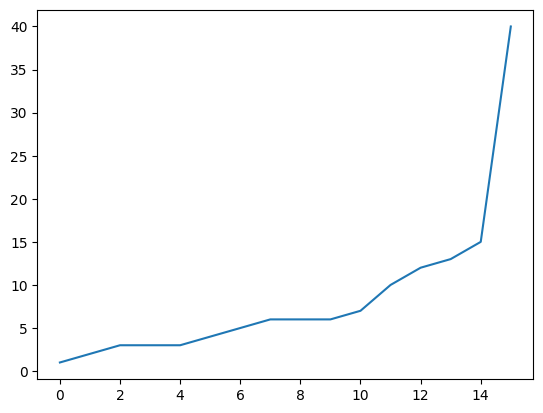

In [101]:
# here is a sample line plot

y = [1,2,3,3,3,4,5,6,6,6,7,10,12,13,15,40]

# this is how you plot that data
plt.plot(y)

In [ ]:
# now you try with the data above!

# Loading your electrophysiology data

In [63]:
in1 = open('/content/biol470/week8/electrode_data/odor_stimulus/baseline_Air1','rb')
pulse_data = pickle.load(in1)
in1.close()

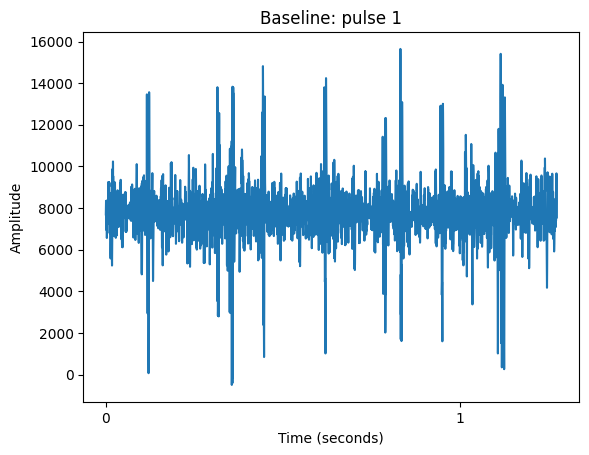

In [102]:
plt.plot(pulse_data[4])
plt.title('Baseline: pulse 1')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')


xticks = [0,10000]
xlabels = ['0','1']

l = plt.xticks(xticks,xlabels)

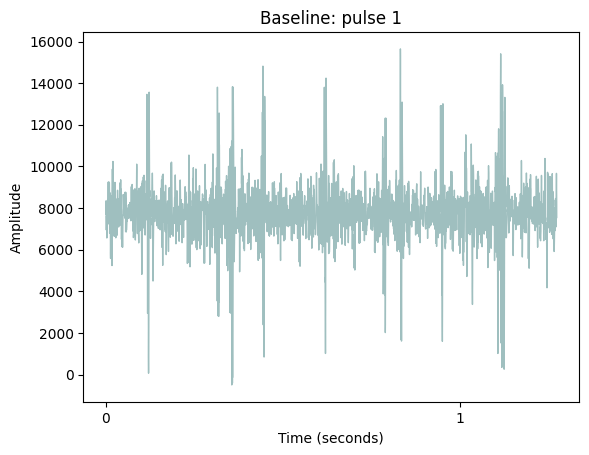

In [103]:
plt.plot(pulse_data[4],linewidth=1,color=(0.25,0.5,0.5,0.5))


plt.title('Baseline: pulse 1')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')


xticks = [0,10000]
xlabels = ['0','1']
l = plt.xticks(xticks,xlabels)

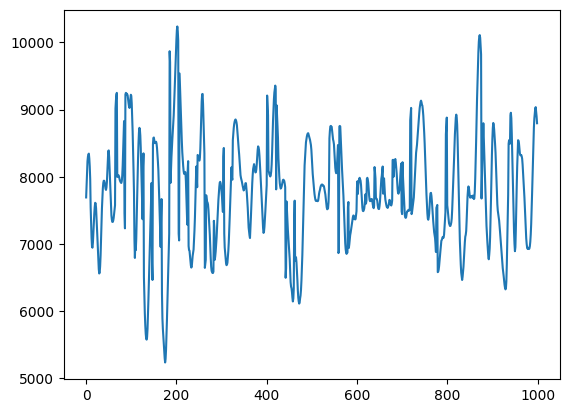

In [105]:
plt.plot(pulse_data[4][:1000])

In [106]:
import scipy.signal as sg
b, a = sg.butter(4, 60. / (10000 / 2.), 'low')
x_fil = sg.filtfilt(b, a, pulse_data[4])

(-636.3000000000001, 13362.3, -1307.2, 16451.2)

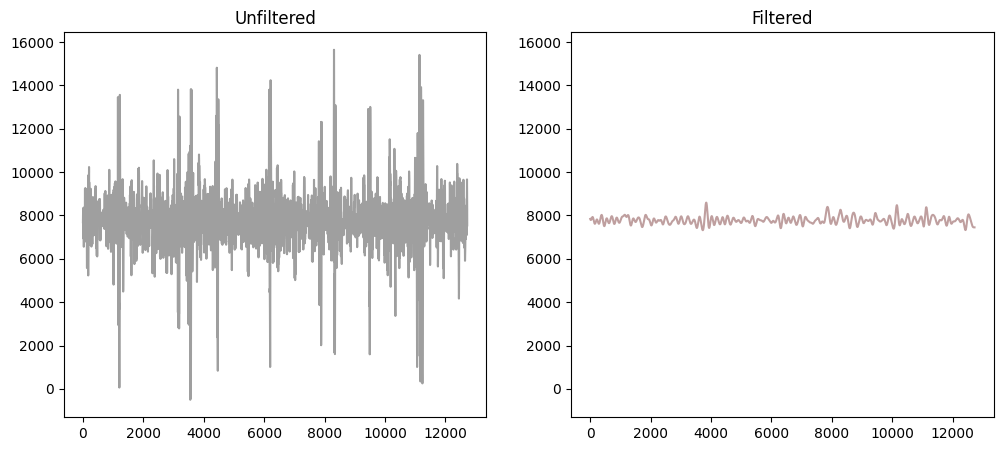

In [107]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_title('Unfiltered')
ax[0].plot(pulse_data[4],color=(0.25,0.25,0.25,0.5))
ax1 = ax[0].axis()

ax[1].set_title('Filtered')
ax[1].plot(x_fil,color=(0.5,0.25,0.25,0.5))
ax[1].axis(ax1)

(-49.95, 1048.95, 4986.0, 10486.0)

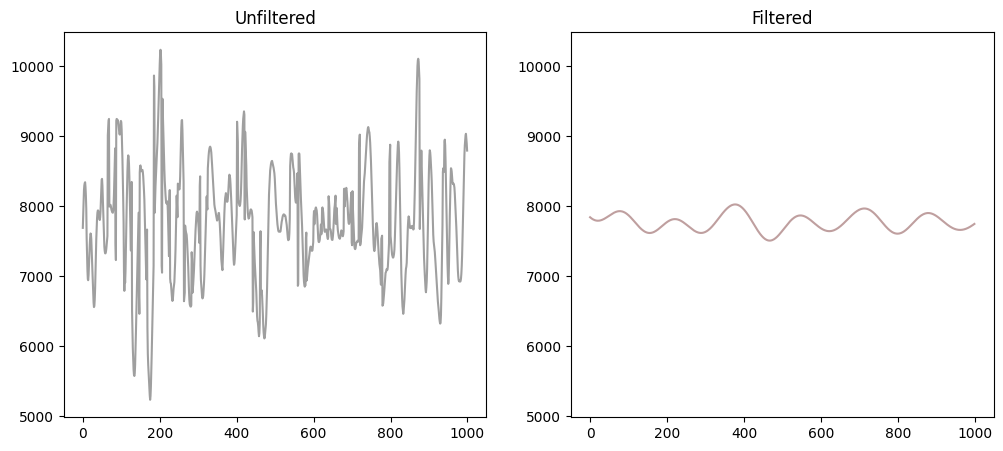

In [119]:
fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].set_title('Unfiltered')
ax[0].plot(pulse_data[4][:1000],color=(0.25,0.25,0.25,0.5))
ax1 = ax[0].axis()

ax[1].set_title('Filtered')
ax[1].plot(x_fil[:1000],color=(0.5,0.25,0.25,0.5))
ax[1].axis(ax1)

In [111]:
data_full = []

for ee in np.arange(4,len(pulse_data),4):
  data_full+=list(pulse_data[ee])

print(len(data_full))

79450


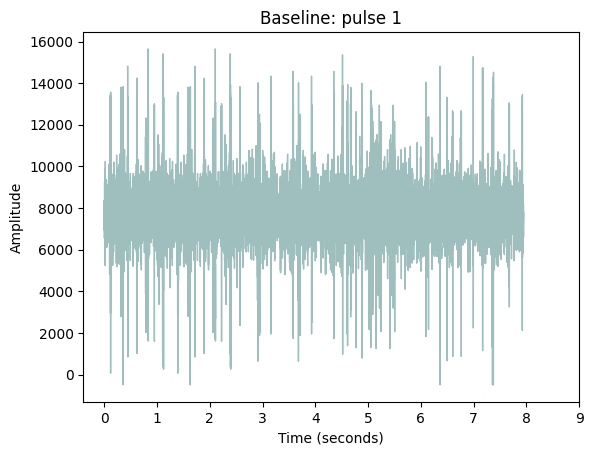

In [112]:
plt.plot(data_full,linewidth=1,color=(0.25,0.5,0.5,0.5))

plt.title('Baseline: pulse 1')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

xticks = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000]
xlabels = ['0','1','2','3','4','5','6','7','8','9']
l = plt.xticks(xticks,xlabels)

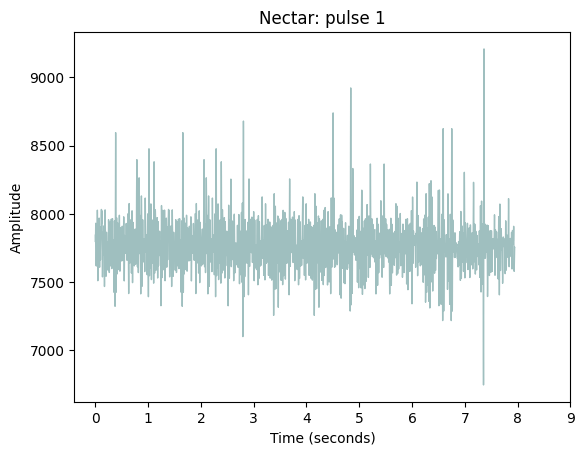

In [113]:
x_fil_II = sg.filtfilt(b, a, data_full)
plt.plot(x_fil_II,linewidth=1,color=(0.25,0.5,0.5,0.5))


plt.title('Nectar: pulse 1')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

xticks = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000]
xlabels = ['0','1','2','3','4','5','6','7','8','9']
l = plt.xticks(xticks,xlabels)

In [143]:
np.nanmean(x_fil_II)+(np.nanstd(x_fil_II)*2)

7960.537228103069

[]

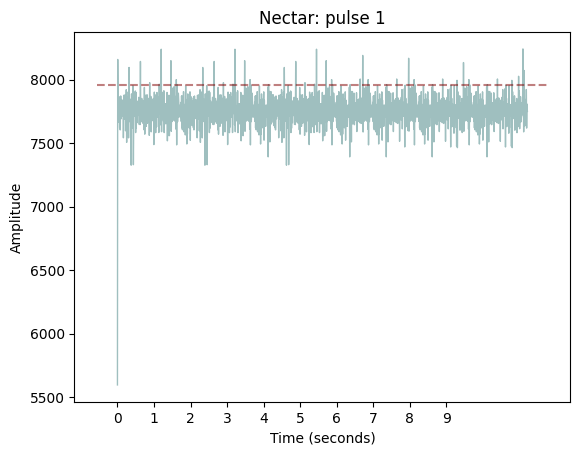

In [144]:
x_fil_II = sg.filtfilt(b, a, data_full)
plt.plot(x_fil_II,linewidth=1,color=(0.25,0.5,0.5,0.5))


plt.title('Nectar: pulse 1')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

xticks = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000]
xlabels = ['0','1','2','3','4','5','6','7','8','9']
l = plt.xticks(xticks,xlabels)

a1 = plt.axis()

thresh = np.nanmean(x_fil_II)+(np.nanstd(x_fil_II)*2)
plt.plot([a1[0],a1[1]],[thresh,thresh],linestyle='--',color=(0.5,0,0,0.5))

plt.plot()

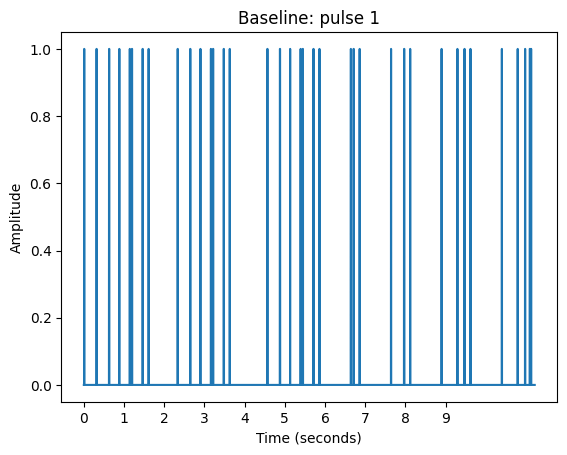

In [145]:
thresh = x_fil_II > np.nanmean(x_fil_II)+(np.nanstd(x_fil_II)*2)
plt.plot(thresh)

plt.title('Baseline: pulse 1')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

xticks = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000]
xlabels = ['0','1','2','3','4','5','6','7','8','9']
l = plt.xticks(xticks,xlabels)

In [116]:
spectrogram = librosa.feature.melspectrogram(y=np.array(data_full), sr=10000, n_mels=224)
spectrogram = librosa.power_to_db(spectrogram, ref=np.max)  # Convert to dB scale

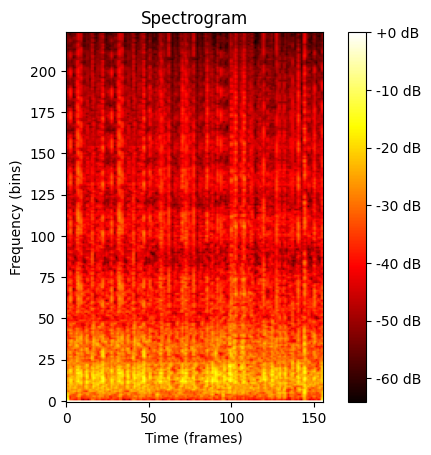

In [118]:
plt.imshow(spectrogram, cmap='hot', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency (bins)')
#plt.axis('off')
plt.show()

In [126]:
in1 = open('/content/biol470/week8/electrode_data/odor_stimulus/baseline Peppermint1_pulse','rb')
pulse_data = pickle.load(in1)
in1.close()

In [133]:
data_full = []
for ee in pulse_data[0]:
  data_full+=list(ee)

print(len(data_full))

87508


[]

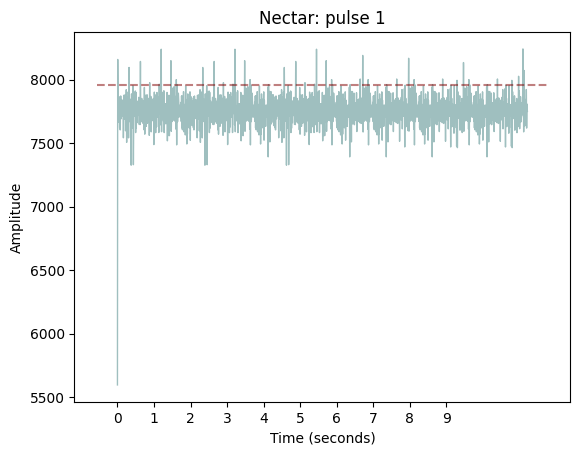

In [146]:
x_fil_II = sg.filtfilt(b, a, data_full)
plt.plot(x_fil_II,linewidth=1,color=(0.25,0.5,0.5,0.5))


plt.title('Nectar: pulse 1')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

xticks = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000]
xlabels = ['0','1','2','3','4','5','6','7','8','9']
l = plt.xticks(xticks,xlabels)

a1 = plt.axis()
plt.plot([a1[0],a1[1]],[np.nanmean(x_fil_II)+(np.nanstd(x_fil_II)*2),np.nanmean(x_fil_II)+(np.nanstd(x_fil_II)*2)],linestyle='--',color=(0.5,0,0,0.5))

plt.plot()

In [ ]:


for indd,ee1 in enumerate(pulse_data):
  plt.figure()
  data_full = []
  for ee in ee1:
    data_full+=list(ee)
  x_fil_II = sg.filtfilt(b, a, data_full)

  plt.plot(x_fil_II,linewidth=1,color=(0.25,0.5,0.5,0.5))
  #plt.plot(data_full,linewidth=1,color=(0.25,0.5,0.5,0.5))
  a1 = plt.axis()
  thresh = x_fil_II > np.nanmean(x_fil_II)+(np.nanstd(x_fil_II)*2)
  plt.plot([a1[0],a1[1]],[thresh,thresh],linestyle='--',color=(0.5,0,0,0.5))
  print(len(data_full))

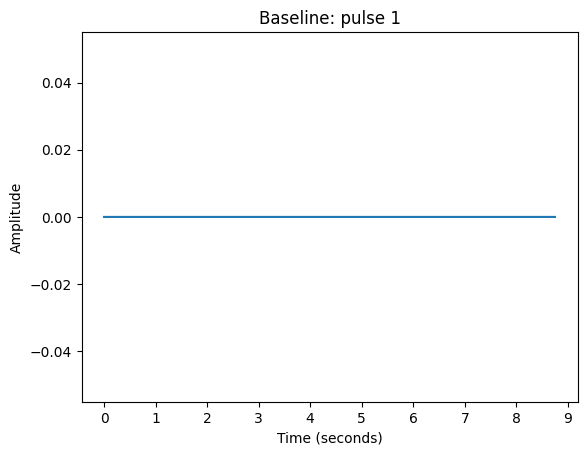

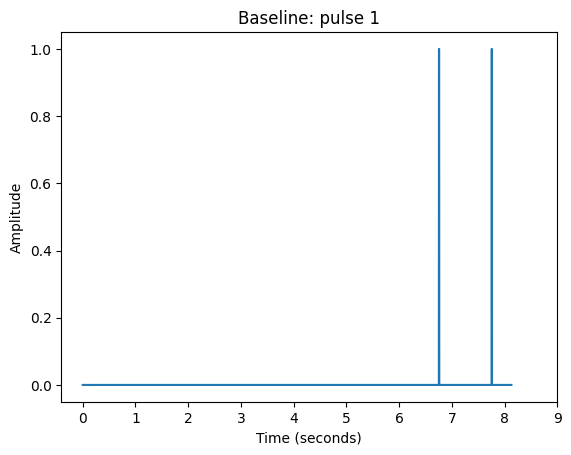

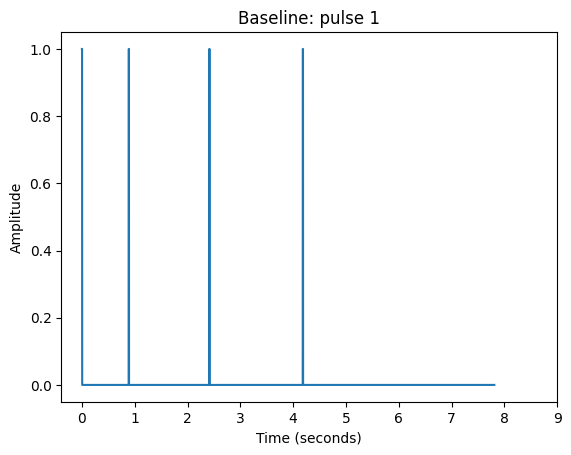

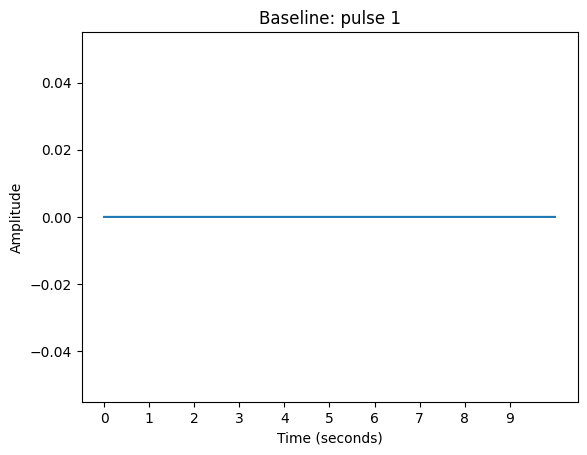

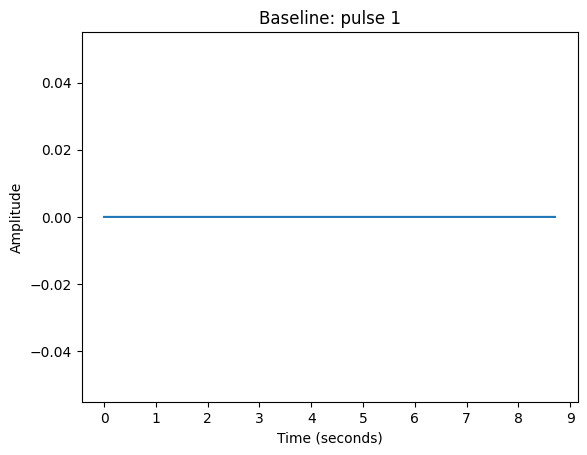

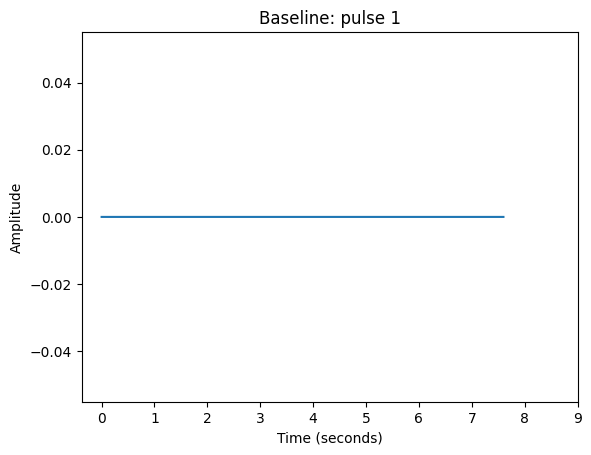

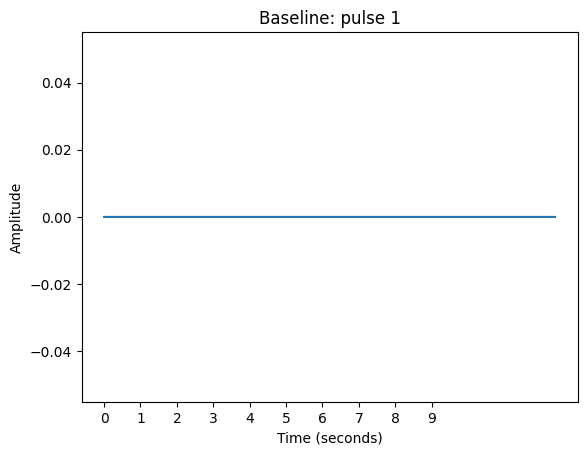

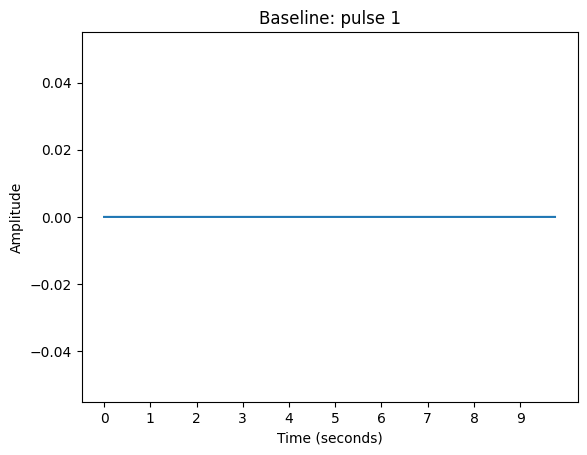

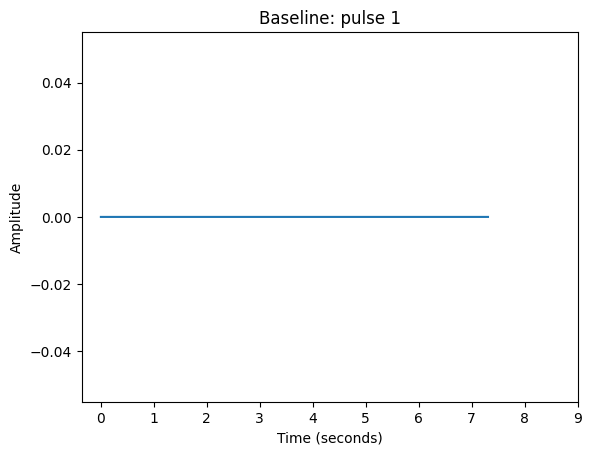

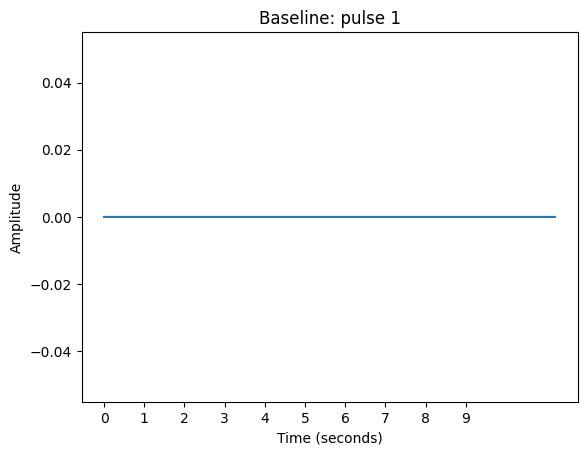

In [141]:
for indd,ee1 in enumerate(pulse_data):
  plt.figure()
  data_full = []
  for ee in ee1:
    data_full+=list(ee)

  x_fil_II = sg.filtfilt(b, a, data_full)
  thresh = x_fil_II > 8250
  plt.plot(thresh)

  plt.title('Baseline: pulse 1')
  plt.xlabel('Time (seconds)')
  plt.ylabel('Amplitude')

  xticks = [0,10000,20000,30000,40000,50000,60000,70000,80000,90000]
  xlabels = ['0','1','2','3','4','5','6','7','8','9']
  l = plt.xticks(xticks,xlabels)

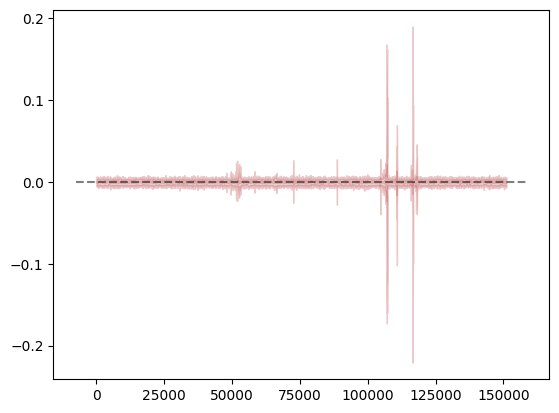

In [ ]:
#@title Bee
cA = [(0.7,0.2,0.2,0.2),(0.2,0.7,0.2,0.2),(0.2,0.2,0.7,0.2)]
for indd,ee in enumerate(['/content/BYB_Recording_2025-02-19_22.05.28.wav']):
  audio, sr = librosa.load(ee)
  sWindow = 50
  fly = audio
  if len(fly)> sWindow:
    mm = []
    ss = []
    for ee in np.arange(sWindow,len(fly),sWindow):
      meann = np.nanmean(fly[ee-sWindow:ee])
      stdd = np.nanstd(fly[ee-sWindow:ee])
      mse = stdd#/np.sqrt(sWindow)
      mm.append(meann)
      ss.append(mse)
  if len(fly)> sWindow:
    mm = np.array(mm)-mm[0]
    ss = np.array(ss)
    o = plt.plot(np.arange(sWindow,len(fly),sWindow),np.array(mm),color=cA[indd],linewidth=1)
    o =plt.fill_between(np.arange(sWindow,len(fly),sWindow),np.array(mm)-np.array(ss),np.array(mm)+np.array(ss),alpha=0.25,color=cA[indd])
  else:
    plt.plot(fly,color=cA[cnt])
a1 = plt.axis()
plt.plot([a1[0],a1[1]],[0,0],linestyle='--',color=(0,0,0,0.5))

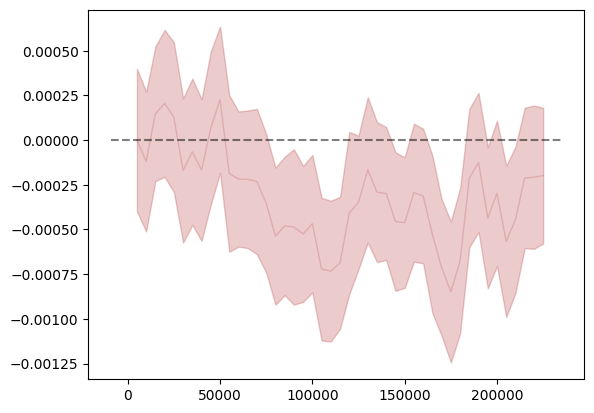

In [ ]:
#@title Touch
cA = [(0.7,0.2,0.2,0.2),(0.2,0.7,0.2,0.2),(0.2,0.2,0.7,0.2)]
for indd,ee in enumerate(['/content/touch_1.wav']):
  audio, sr = librosa.load(ee)
  sWindow = 5000
  fly = audio
  if len(fly)> sWindow:
    mm = []
    ss = []
    for ee in np.arange(sWindow,len(fly),sWindow):
      meann = np.nanmean(fly[ee-sWindow:ee])
      stdd = np.nanstd(fly[ee-sWindow:ee])
      mse = stdd#/np.sqrt(sWindow)
      mm.append(meann)
      ss.append(mse)
  if len(fly)> sWindow:
    mm = np.array(mm)-mm[0]
    ss = np.array(ss)
    o = plt.plot(np.arange(sWindow,len(fly),sWindow),np.array(mm),color=cA[indd],linewidth=1)
    o =plt.fill_between(np.arange(sWindow,len(fly),sWindow),np.array(mm)-np.array(ss),np.array(mm)+np.array(ss),alpha=0.25,color=cA[indd])
  else:
    plt.plot(fly,color=cA[cnt])

plt.plot([a1[0],a1[1]],[0,0],linestyle='--',color=(0,0,0,0.5))

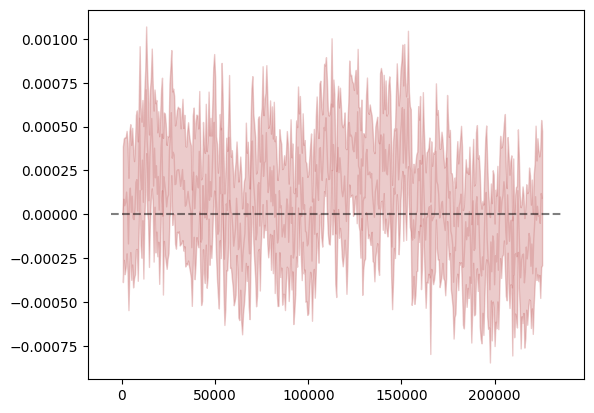

In [ ]:
#@title bee 2
cA = [(0.7,0.2,0.2,0.2),(0.2,0.7,0.2,0.2),(0.2,0.2,0.7,0.2)]
for indd,ee in enumerate(['/content/bee_2.wav']):
  audio, sr = librosa.load(ee)
  sWindow = 500
  fly = audio
  if len(fly)> sWindow:
    mm = []
    ss = []
    for ee in np.arange(sWindow,len(fly),sWindow):
      meann = np.nanmean(fly[ee-sWindow:ee])
      stdd = np.nanstd(fly[ee-sWindow:ee])
      mse = stdd#/np.sqrt(sWindow)
      mm.append(meann)
      ss.append(mse)
  if len(fly)> sWindow:
    mm = np.array(mm)-mm[0]
    ss = np.array(ss)
    o = plt.plot(np.arange(sWindow,len(fly),sWindow),np.array(mm),color=cA[indd],linewidth=1)
    o =plt.fill_between(np.arange(sWindow,len(fly),sWindow),np.array(mm)-np.array(ss),np.array(mm)+np.array(ss),alpha=0.25,color=cA[indd])
  else:
    plt.plot(fly,color=cA[cnt])
plt.plot([a1[0],a1[1]],[0,0],linestyle='--',color=(0,0,0,0.5))